In [17]:
import numpy as np 
from focus_calibrator import * 
import cv2
import datetime
import os
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('calibrate.avi', fourcc, 20.0, (640, 480))

# Open the default camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('Video', frame)
    # Write the flipped frame
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f calibrate.avi")



[ WARN:0@202.181] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/openface-build/build/bin/model/cen_general.txt
Reading the PDM module from: /home/openface-build/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/openface-build/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done


libdc1394 error: Failed to initialize libdc1394


Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/model_eye/main_clnf_synth_left.txt
Reading the landmark detector module from: /home/openface-build/build/bin/model/model_eye/clnf_left_synth.txt
Reading the PDM module from: /home/openface-build/build/bin/model/model_eye/pdms/pdm_28_l_eye_3D_closed.txt....Done
Reading the intensity CCNF patch experts from: /home/openface-build/build/bin/model/model_eye/patch_experts/left_ccnf_patches_1.00_synth_lid_.txt....Done
Reading the intensity CCNF patch experts from: /home/openface-build/build/bin/model/model_eye/patch_experts/left_ccnf_patches_1.50_synth_lid_.txt....Done
Could not find the landmark detection model to load
Done
Reading part based module....right_eye_28
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/

0

In [ ]:
import os
import numpy as np 
from focus_calibrator import * 
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f demo.avi")

In [18]:
from focus_calibrator import * 
gaze_tracker = Focus_Calibrator('processed/calibrate.csv')

In [19]:
gaze_scores = gaze_tracker('processed/calibrate.csv')
gaze_scores

array([0.74025974, 0.76623377, 0.74025974, 0.77922078, 0.74025974,
       0.71428571, 0.74025974, 0.72727273, 0.72727273, 0.72727273,
       0.72727273, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
       0.71428571, 0.7012987 , 0.71428571, 0.7012987 , 0.67532468,
       0.67532468, 0.68831169, 0.67532468, 0.7012987 , 0.68831169,
       0.68831169, 0.68831169, 0.71428571, 0.72727273, 0.74025974,
       0.48101266, 0.35443038, 0.27848101, 0.27848101, 0.17721519,
       0.12658228, 0.17721519, 0.07594937, 0.12658228, 0.05063291,
       0.        , 0.02531646, 0.02531646, 0.05063291, 0.10126582,
       0.27848101, 0.8961039 , 0.81012658, 0.60759494, 0.55696203,
       0.43037975, 0.50632911, 0.32911392, 0.25316456, 0.35443038,
       0.27848101, 0.32911392, 0.40506329, 0.40506329, 0.7012987 ,
       0.27848101, 0.27848101, 0.35443038, 0.32911392, 0.32911392,
       0.35443038, 0.4556962 , 0.81818182, 0.88607595, 0.77922078,
       0.46753247, 0.44155844, 0.24675325, 0.12987013, 0.01298

In [13]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('test_vid.avi', fourcc, 20.0, (640, 480))

# Open the default camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('Video', frame)
    # Write the flipped frame
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
os.system("docker exec openface_docker /home/openface-build/build/bin/FeatureExtraction -f test_vid.avi")



[ WARN:0@97.901] global cap_gstreamer.cpp:1777 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1
libdc1394 error: Failed to initialize libdc1394


Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /home/openface-build/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /home/openface-build/build/bin/model/cen_general.txt
Reading the PDM module from: /home/openface-build/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /home/openface-build/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /home/openface-build/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....l

0

In [15]:
gaze_scores = gaze_tracker('processed/test_vid.csv')
np.min(gaze_scores)


np.sum(gaze_scores < 0)/np.sum(gaze_scores > 0)



0.16176470588235295

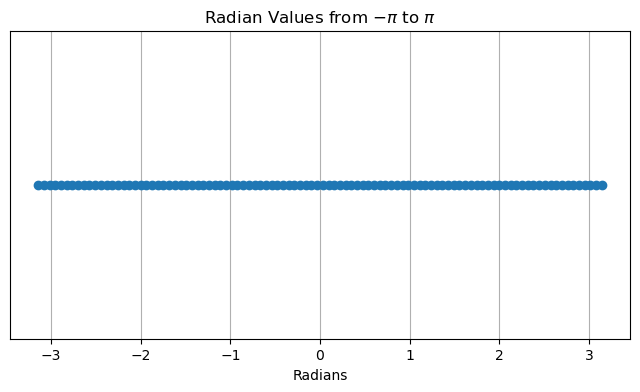

In [12]:

# Release everything if job is finished

In [12]:
import cv2

# Set up the camera
cap = cv2.VideoCapture(0)  # 0 is usually the default camera

if not cap.isOpened():
    print("Error: Camera could not be opened.")
    exit()

# Continuously capture frames from the camera
while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Frame could not be retrieved.")
        breake

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Wait for a key press for 1ms
    key = cv2.waitKey(1) & 0xFF

    # Define actio
# Release everything if job is finishedns based on key press
    if key == ord('u'):
        cv2.imwrite('image_up.jpg', frame)
        print("Saved image_up.jpg")
    elif key == ord('d'):
        cv2.imwrite('image_down.jpg', frame)
        print("Saved image_down.jpg")
    elif key == ord('l'):
        cv2.imwrite('image_left.jpg', frame)
        print("Saved image_left.jpg")
    elif key == ord('r'):
        cv2.imwrite('image_right.jpg', frame)
        print("Saved image_right.jpg")
    elif key == ord('q'):
        # Quit the program when 'q' is pressed
        print("Exiting...")ud
# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (318487332.py, line 39)

In [20]:
import numpy as np
import cv2 as cv

# Load gaze scores here, assuming gaze_scores is defined somewhere else
# gaze_scores = ...

# Initialize video capture
cap = cv.VideoCapture('processed/calibrate.avi')
if not cap.isOpened():
    print("Error: Could not open video.")
    exit(1)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

# Initialize VideoWriter
result = cv.VideoWriter('output.avi', cv.VideoWriter_fourcc(*'XVID'), 10, size)

index = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    if index >= len(gaze_scores):
        print("Index exceeds length of gaze scores.")
        break

    # Adding gaze score to the frame
    cv.putText(frame, "Gaze Score: " + str(gaze_scores[index]), (50, 50), cv.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
    
    # Show frame (for debugging, remove or comment out in production)
    cv.imshow('frame', frame)
    result.write(frame)
    
    index += 1
    if cv.waitKey(33) == ord('q'):
        break

cap.release()
result.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting ...
